In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import fnmatch
from sklearn import svm
from sklearn.model_selection import train_test_split
import librosa
import numpy as np
import pandas as pd
from librosa import display

In [ ]:
os.chdir("/content/gdrive/MyDrive/ALDA/LubDub")

In [ ]:
ls

Atraining_artifact/  Atraining_normal/      Btraining_normal/
Atraining_extrahls/  Btraining_extrastole/  weights.best.hdf5
Atraining_murmur/    Btraining_murmur/      weights-improvement-01-0.78.hdf5


## Plotting

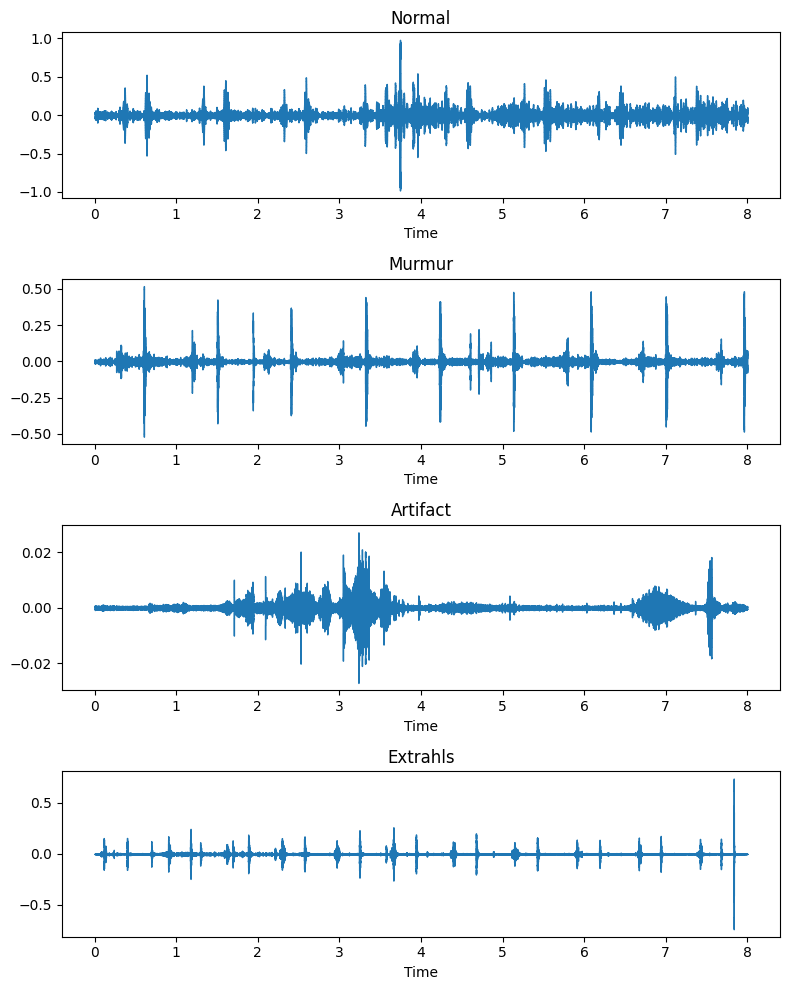

In [ ]:
import librosa.display
import matplotlib.pyplot as plt


plt.figure(figsize = (8, 10))
plt.subplot(4,1,1)
sampledata, sampling_rate = librosa.load('Atraining_normal/201101151127.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Normal')

plt.subplot(4,1,2)
sampledata, sampling_rate = librosa.load('Atraining_murmur/201102052338.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Murmur')

plt.subplot(4,1,3)
sampledata, sampling_rate = librosa.load('Atraining_artifact/201105041959.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Artifact')

plt.subplot(4,1,4)
sampledata, sampling_rate = librosa.load('Atraining_extrahls/201101241433.wav', sr=44100, offset = 1 )
librosa.display.waveshow(sampledata, sr=sampling_rate)
plt.title('Extrahls')

plt.tight_layout()

In [ ]:
def extract_feature(file_name):
  X, sample_rate = librosa.load(file_name)
  # STFT
  stft = np.abs(librosa.stft(X))
  # MFCCS
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  # Chroma
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
  # contrast
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
  # tonnetz
  tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),sr=sample_rate).T,axis=0)
  # Combining all the features
  arrays_sound = np.hstack((mfccs, chroma,contrast,tonnetz))
  
  return arrays_sound.reshape([-1, 1])

In [ ]:
def decodeFolder(category):
  print("Starting decoding folder "+category+" ...")
  listOfFiles = os.listdir(category)
  listOfFiles = fnmatch.filter(listOfFiles, '*.wav')
  arrays_sound = []
  for file in listOfFiles:
    filename = os.path.join(category,file)
    features_sound = extract_feature(filename)
    arrays_sound.append(features_sound)
  return arrays_sound

In [ ]:
normal_sounds = decodeFolder("Atraining_normal")
murmur_sounds = decodeFolder("Atraining_murmur")
artifact_sounds = decodeFolder("Atraining_artifact")
extrahls_sounds = decodeFolder("Atraining_extrahls")

In [ ]:
normal_soundsB = decodeFolder("Btraining_normal")

Starting decoding folder Btraining_normal ...


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=820
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=868
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=712
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=1017
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=932
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=975
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWa

In [ ]:
murmur_soundsB = decodeFolder("Btraining_murmur")

Starting decoding folder Btraining_murmur ...


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=591
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=296
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=964
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=939
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=771
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=961
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWar

In [ ]:
extrahls_labels = np.ones(len(extrahls_sounds)) * 3
artifact_labels = np.ones(len(artifact_sounds)) * 2
murmur_labels = np.ones(len(murmur_sounds)) * 1
normal_labels = np.ones(len(normal_sounds)) * 0
normal_labelsB = np.ones(len(normal_soundsB)) * 0
murmur_labelsB = np.ones(len(murmur_soundsB)) * 1

In [ ]:
train_sounds = np.concatenate((normal_sounds, normal_soundsB, murmur_sounds,murmur_soundsB, artifact_sounds, extrahls_sounds))
train_labels = np.concatenate((normal_labels, normal_labelsB, murmur_labels, murmur_labelsB, artifact_labels, extrahls_labels))

In [ ]:
train_sounds.shape

(390, 65, 1)

In [ ]:
train_sounds[0].shape

(65, 1)

In [ ]:
X = train_sounds
y = train_labels

## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 13)

# SVM

In [ ]:
clf =svm.SVC()
clf.fit(X_train, y_train)
print("training done")
predict = clf.predict(X_test)

training done


## One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_train = OneHotEncoder(max_categories=4, sparse_output=False).fit_transform(y_train.reshape(-1, 1))
y_test = OneHotEncoder(max_categories=4, sparse_output=False).fit_transform(y_test.reshape(-1, 1))

In [ ]:
X_train.shape, y_train.shape

((312, 65, 1), (312, 4))

##LSTM

In [ ]:
import numpy as np

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.utils import np_utils
from sklearn import metrics 

print('Build LSTM RNN model ...')


Build LSTM RNN model ...


In [ ]:
def create_model(dropout_, recurrent_dropout_):
  model = Sequential()
  model.add(LSTM(units=64, dropout=dropout_, recurrent_dropout=recurrent_dropout_, return_sequences=True,input_shape = (65,1)))
  model.add(LSTM(units=32, dropout=dropout_, recurrent_dropout=recurrent_dropout_, return_sequences=False))
  model.add(Dense(4, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
y_test.shape, y_train.shape

((78, 4), (312, 4))

In [ ]:

filepath="weights.best.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# es = EarlyStopping(monitor='val_accuracy', patience=5)
callbacks_list = [checkpoint]
# Fit the model
model = create_model(0.05, 0.05)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=callbacks_list, verbose=1)


Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.5364 - accuracy: 0.7788
Epoch 1: val_accuracy improved from -inf to 0.78205, saving model to weights.best.hdf5
10/10 [==============================] - 5s 518ms/step - loss: 0.5364 - accuracy: 0.7788 - val_loss: 0.4951 - val_accuracy: 0.7821
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.5367 - accuracy: 0.7756
Epoch 2: val_accuracy did not improve from 0.78205
10/10 [==============================] - 6s 657ms/step - loss: 0.5367 - accuracy: 0.7756 - val_loss: 0.4967 - val_accuracy: 0.7821
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.7821
Epoch 3: val_accuracy did not improve from 0.78205
10/10 [==============================] - 4s 434ms/step - loss: 0.5262 - accuracy: 0.7821 - val_loss: 0.5007 - val_accuracy: 0.7821
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.7788
Epoch 4: val_accuracy did not improve 

In [ ]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 36ms/step


In [ ]:
y_test[2], y_pred[2]

(array([1., 0., 0., 0.]),
 array([0.74166185, 0.256248  , 0.00077674, 0.00131344], dtype=float32))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.argmax(1), y_pred.argmax(1)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test.argmax(1), y_pred.argmax(1)))

=== Confusion Matrix ===
[[46  2  0  0]
 [ 9  7  0  0]
 [ 0  0  8  1]
 [ 5  0  0  0]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.96      0.85        48
           1       0.78      0.44      0.56        16
           2       1.00      0.89      0.94         9
           3       0.00      0.00      0.00         5

    accuracy                           0.78        78
   macro avg       0.64      0.57      0.59        78
weighted avg       0.75      0.78      0.75        78



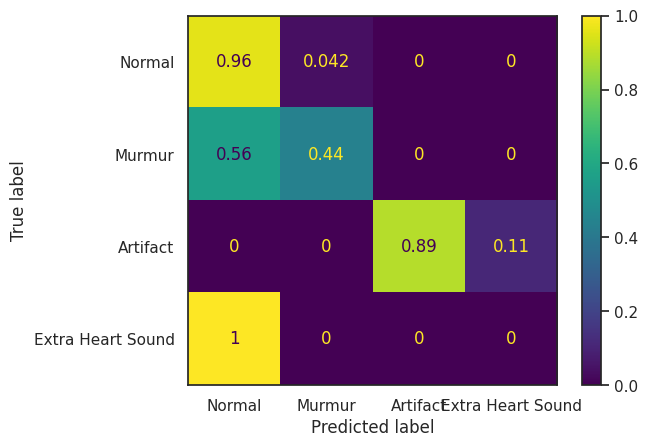

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test.argmax(1), y_pred.argmax(1),  normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Murmur', 'Artifact', 'Extra Heart Sound'])
cm_display.plot()
plt.show()

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
seed = 7
tf.random.set_seed(seed)
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
model = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=0)

In [ ]:
dropout_ = [0.0, 0.05, 0.08]
recurrent_dropout_ = [0.0, 0.05, 0.08]
param_grid = dict(model__dropout_=dropout_, model__recurrent_dropout_=recurrent_dropout_)

In [ ]:
param_grid

{'model__dropout_': [0.0, 0.05, 0.08],
 'model__recurrent_dropout_': [0.0, 0.05, 0.08]}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

## Hyperparameter tuning for SVM


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 5)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print("\n The best parameters:\n",grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.368 total time=   0.0s
[CV 1/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 4/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 5/5] END .....C=0.01, gamma=0.1, kernel=rbf;, score=0.368 total time=   0.0s
[CV 1/5] END ....C=0.01, gamma=0.01, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/5] END ....C=0.01, gamma=0.01, kernel=rbf

In [ ]:
predict = grid.predict(X_test)

In [ ]:
from numpy.core.fromnumeric import argmax
y_test.argmax(1)

array([3, 1, 0, 1, 2, 3, 0, 0, 1, 0, 3, 0, 2, 3, 1, 3, 0, 0, 0, 2, 2, 2,
       1, 2, 0])

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test.argmax(1), y_test.argmax(1)))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predict))

=== Confusion Matrix ===
[[4 1 0 0]
 [1 8 0 0]
 [0 0 5 0]
 [2 0 0 4]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         5
           3       1.00      0.67      0.80         6

    accuracy                           0.84        25
   macro avg       0.87      0.84      0.84        25
weighted avg       0.87      0.84      0.85        25



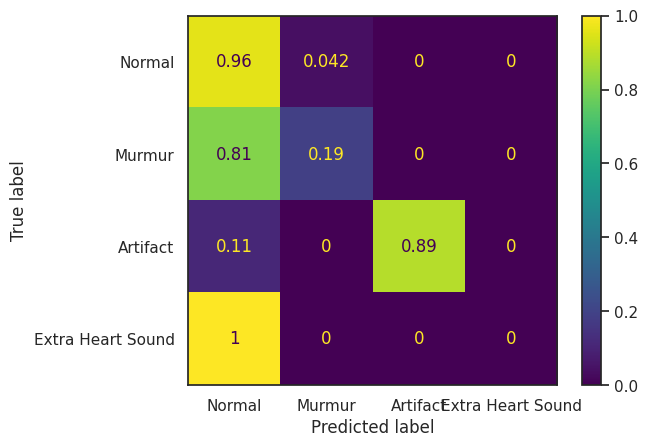

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test.argmax(1), y_pred.argmax(1),  normalize='true')
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Murmur', 'Artifact', 'Extra Heart Sound'])
cm_display.plot()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(grid, X_test, y_test)

feature_names = [ ]
for i in range(66):
  feature_names.append(i)

features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

NameError: ignored

In [ ]:
print(X_test.shape)

(25, 65)


In [ ]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
acc = [39.64, 68.20, 86.86, 94.21, 95.60, 97.37, 97.86, 99.42, 99.97, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100 ]

val_acc = [46.99, 46.99, 54.86, 49.54, 53.94, 60.88, 62.50, 67.13, 73.84, 75.00, 75.46, 75.46, 75.23, 75.23, 75.23, 75.46, 75.23, 75.00, 75.00, 75.23]


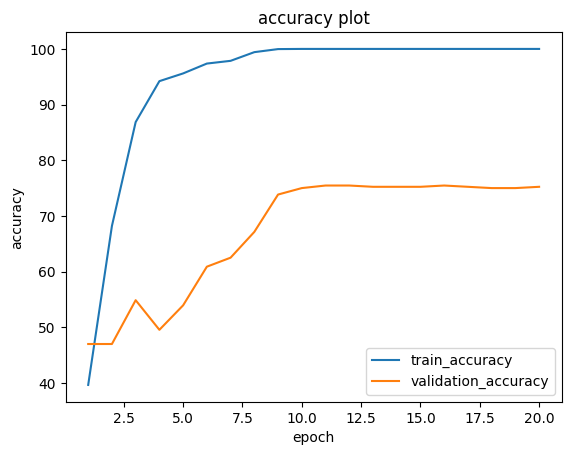

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch, acc, label = 'train_accuracy')
plt.plot(epoch, val_acc, label = 'validation_accuracy')
plt.title("accuracy plot")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

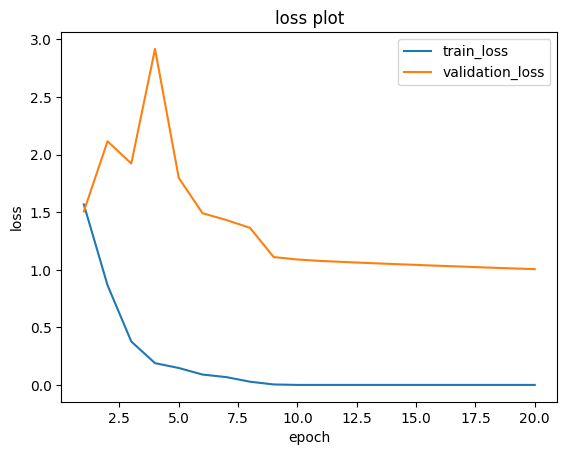

In [ ]:
loss = [1.568, 0.866, 0.378, 0.190, 0.148, 0.091, 0.069, 0.029, 0.005, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]

val_loss = [1.507, 2.116, 1.923, 2.918, 1.799, 1.492, 1.433, 1.365, 1.111, 1.090, 1.077, 1.068, 1.059, 1.051, 1.043, 1.035, 1.028, 1.020, 1.013, 1.006]

plt.plot(epoch, loss, label = 'train_loss')
plt.plot(epoch, val_loss, label = 'validation_loss')
plt.title("loss plot")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()